# PyTorch Data Augmentation 

# <u>Authors:</u>
## 1. Matthias Bartolo ID: 0436103L
## 2. Luke Cardona ID: 0011803H
## 3. Jerome Agius ID: 0353803L
## 4. Isaac Muscat ID: 0265203L

## <u>Installed Packages</u>

In [1]:
#!pip install torchvision 

## <u>Packages</u>

In [2]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
from PIL import Image
import os 

## <u>Loading required images</u>

In [4]:
#Specifying the image directory
directory = "./images/original_images/"

#Function to load the .jpeg images in the specified directory
def loadImages(directory):
    #List to store the original images
    original_imgs = []
    
    #Retrieving the list of all file names
    files = os.listdir(directory);
    for file in files: 
        if(file[len(file)-4:len(file)] == "jpeg"):
            
            #Adding the image to the list of original images
            original_imgs.append(Image.open(directory+file))
    
    #Returning the list of original images
    return original_imgs

#Retrieving the list of original images from the specified directory
original_imgs = loadImages(directory)

## <u>Data Augmentation Functions</u> 

**RandomRotation** - This function rotates the passed image randomly within a set range. 

In [5]:
def RandomRotation(img):
    transform = T.RandomRotation((0,360))
    rotation_img = transform(img)
    return rotation_img, "Rotation Image"

**Brightness** - This function adjusts the brightness of the passed image within a set range.

In [6]:
def Brightness(img):
    brightness_img = T.functional.adjust_brightness(img, random.randint(1,3))
    return brightness_img, "Brightness Image"

**Contrast** - This function adjusts the contrast of the passed image in between a certain range.

In [7]:
def Contrast(img):
    contrast_img = T.functional.adjust_contrast(img, random.randint(1,5))
    return contrast_img, "Contrast Image"

**Saturation** - This function adjusts the saturation of the passed image between a certain range.

In [8]:
def Saturation(img):
    saturation_img = T.functional.adjust_saturation(img,random.randint(1,5))
    return saturation_img, "Saturation Image"

**Hue** - This function adjusts the hue of the passed image between a certain range.

In [9]:
def Hue(img):
    hue_img = T.functional.adjust_hue(img, random.uniform(-0.5,0.5))
    return hue_img, "Hue Image"

**CenterCrop** - This function crops the center of the passed image and returns the cropped out section.

In [10]:
def CenterCrop(img):
    centre_crop = T.CenterCrop([img.size[1]/2,img.size[0]/2])
    centre_crop_img = centre_crop(img)
    return centre_crop_img, "Centre Crop Image"

**HorizontalFlip** - This function flips the passed image horizontally in relation to its center point.

In [11]:
def HorizontalFlip(img):
    horizontal_flip_img = T.functional.hflip(img)
    return horizontal_flip_img, "Horizontal Flip Image"

**VerticalFlip** - This function flips the passed image vertically in relation to its center point.

In [12]:
def VerticalFlip(img):
    vertical_flip_img = T.functional.vflip(img)
    return vertical_flip_img, "Vertical Flip Image"

**Shear** - This function shears the passed image wihtin a set range.

In [13]:
def Shear(img):
    shear_img = T.functional.affine(img, 0, [0,0], 1, [random.randint(1,15),random.randint(1,15)])
    return shear_img, "Shear Image"

**Gamma** - This function alters the gamma values of the passed image within a set range.

In [14]:
def Gamma(img):
    gamma_img = T.functional.adjust_gamma(img, random.uniform(0.5,2), 1)
    return gamma_img, "Gamma Image" 

**GaussianBlur** - This function applies the GaussianBlur kernal onto the passed image

In [15]:
def GaussianBlur(img):
    gaussian_blur_img = T.functional.gaussian_blur(img, random.randrange(5,30,2))
    return gaussian_blur_img, "Gaussian Blur Image"

**Translation** - This function translates the passed image along both axis within a set range. 

In [16]:
def Translation(img):
    translation_img = T.functional.affine(img, 0, [random.randint(-img.size[1]/4,img.size[1]/4),random.randint(-img.size[0]/4,img.size[0]/4)], 1, 0, 0, 0)
    return translation_img, "Translation Image"

**AugmentImg** - This function is used to apply all the image augmentation functions discussed above on the passed image and return a list of augemented images. 

In [17]:
def AugmentImg(img):
    Augmented_Img = {"Rotation":[], "Brightness":[],"Contrast":[],"Saturation":[],
                     "Hue":[],"HorizontalFlip":[],"VerticalFlip":[],"Shear":[],
                    "CenterCrop":[],"Gamma":[],"GaussianBlur":[],"Translation": []}
    
    #Executing all augmentation function fives times per image and storing the results
    for x in range(5):
        Augmented_Img["Rotation"].append(RandomRotation(img))
        Augmented_Img["Brightness"].append(Brightness(img))
        Augmented_Img["Contrast"].append(Contrast(img))
        Augmented_Img["Saturation"].append(Saturation(img))
        Augmented_Img["Hue"].append(Hue(img))
        Augmented_Img["HorizontalFlip"].append(HorizontalFlip(img))
        Augmented_Img["VerticalFlip"].append(VerticalFlip(img))
        Augmented_Img["Shear"].append(Shear(img))
        Augmented_Img["CenterCrop"].append(CenterCrop(img))
        Augmented_Img["Gamma"].append(Gamma(img))
        Augmented_Img["GaussianBlur"].append(GaussianBlur(img))
        Augmented_Img["Translation"].append(Translation(img))
    return Augmented_Img

In [18]:
AugmentedImgs = []

for img in original_imgs: 
    AugmentedImgs.append(AugmentImg(img))

# <u>Output Display</u>

This method displays all the altered images in an ordarly manner for presentation purposes.

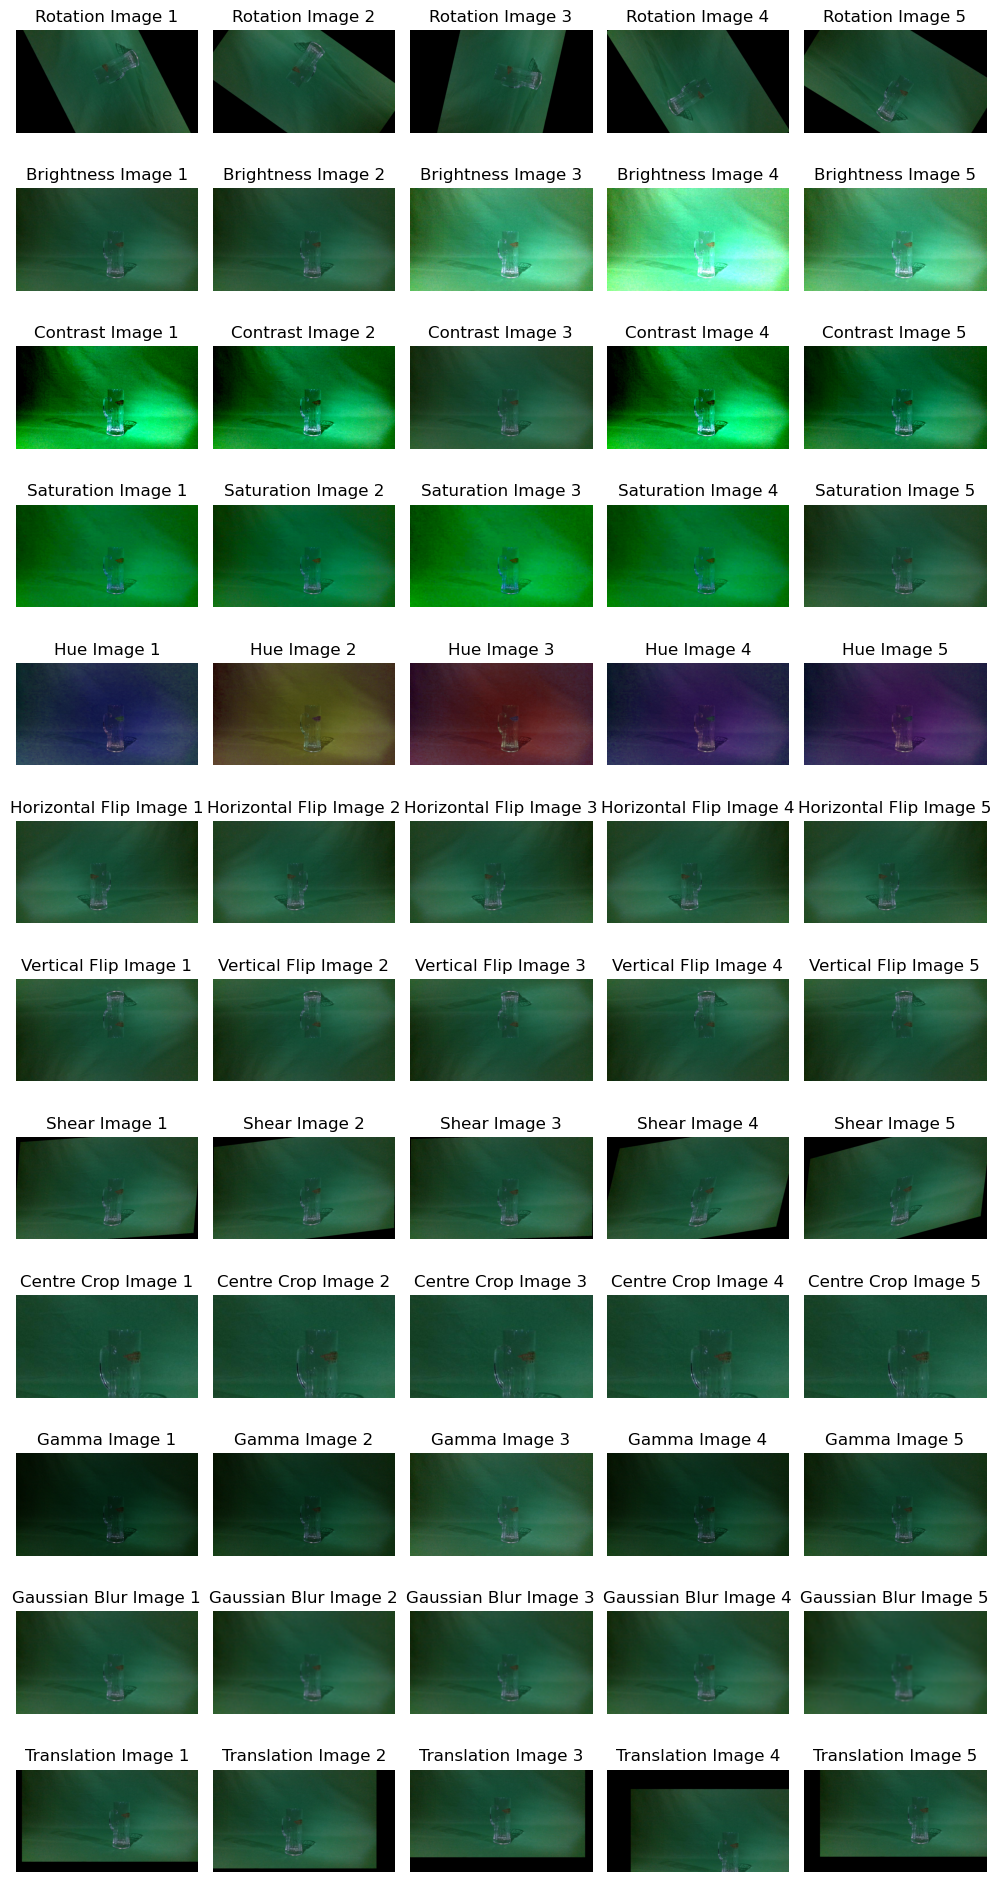

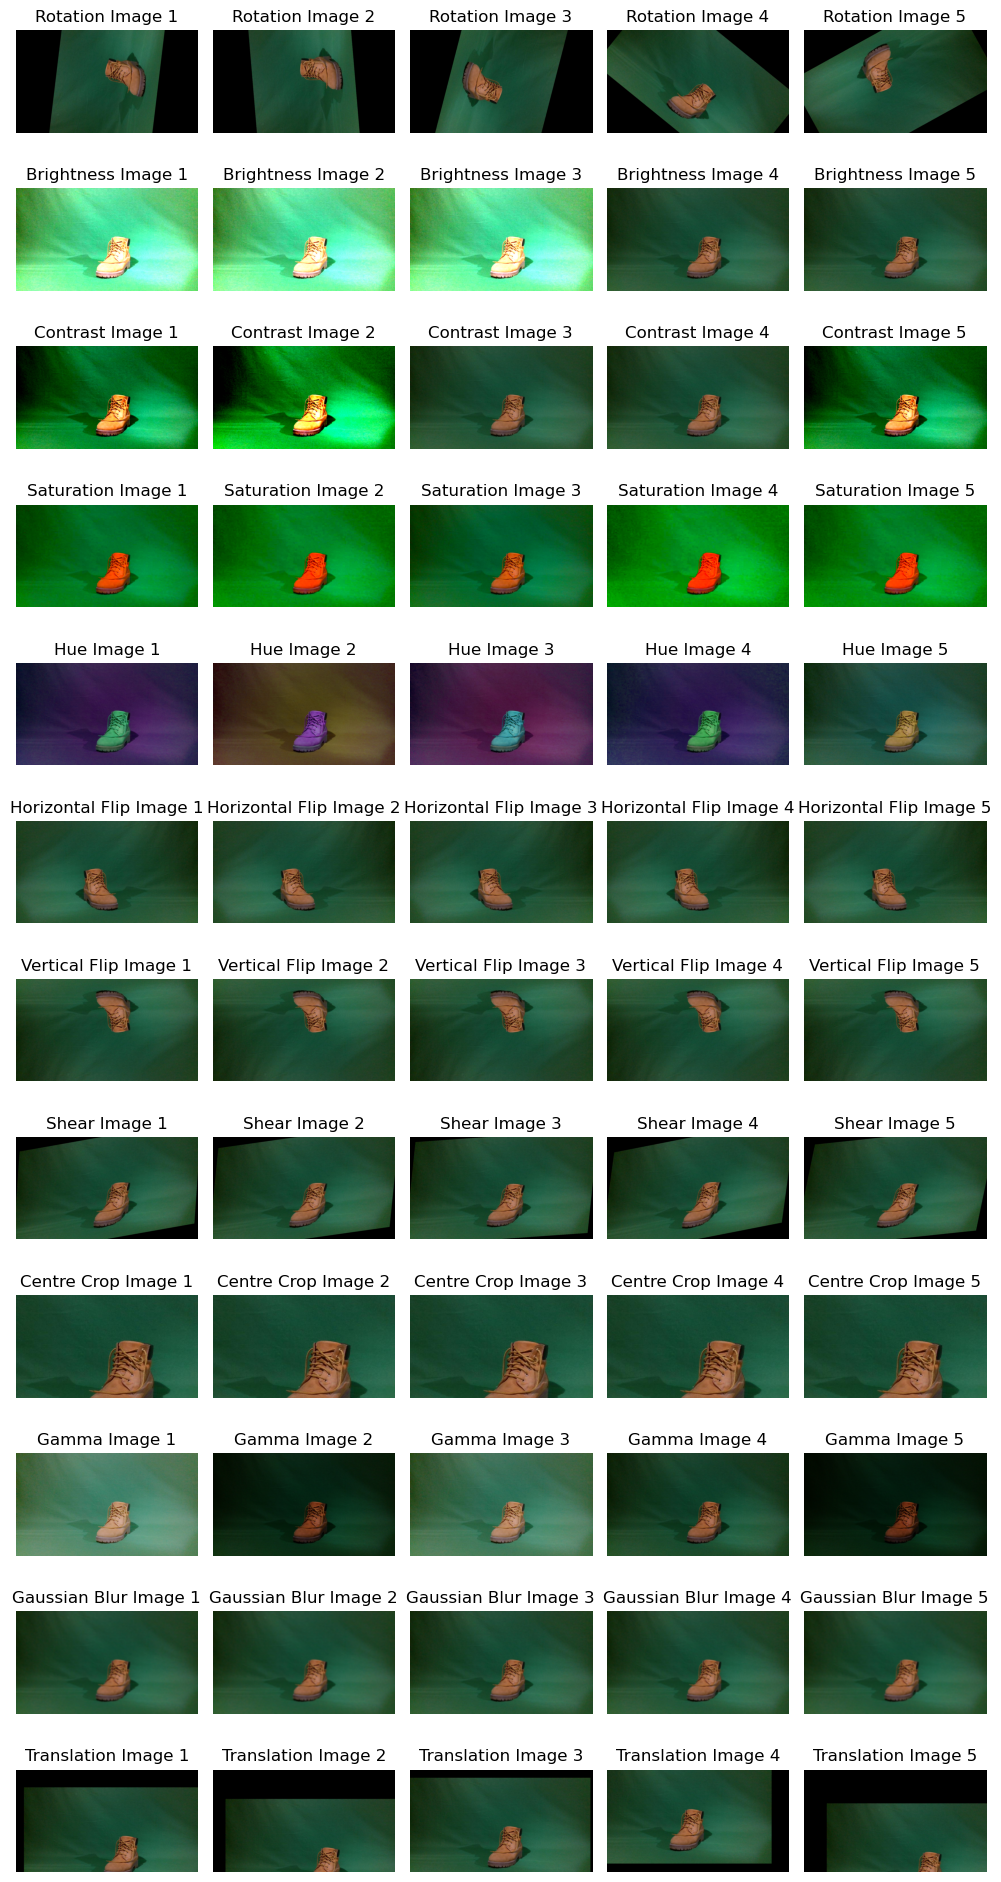

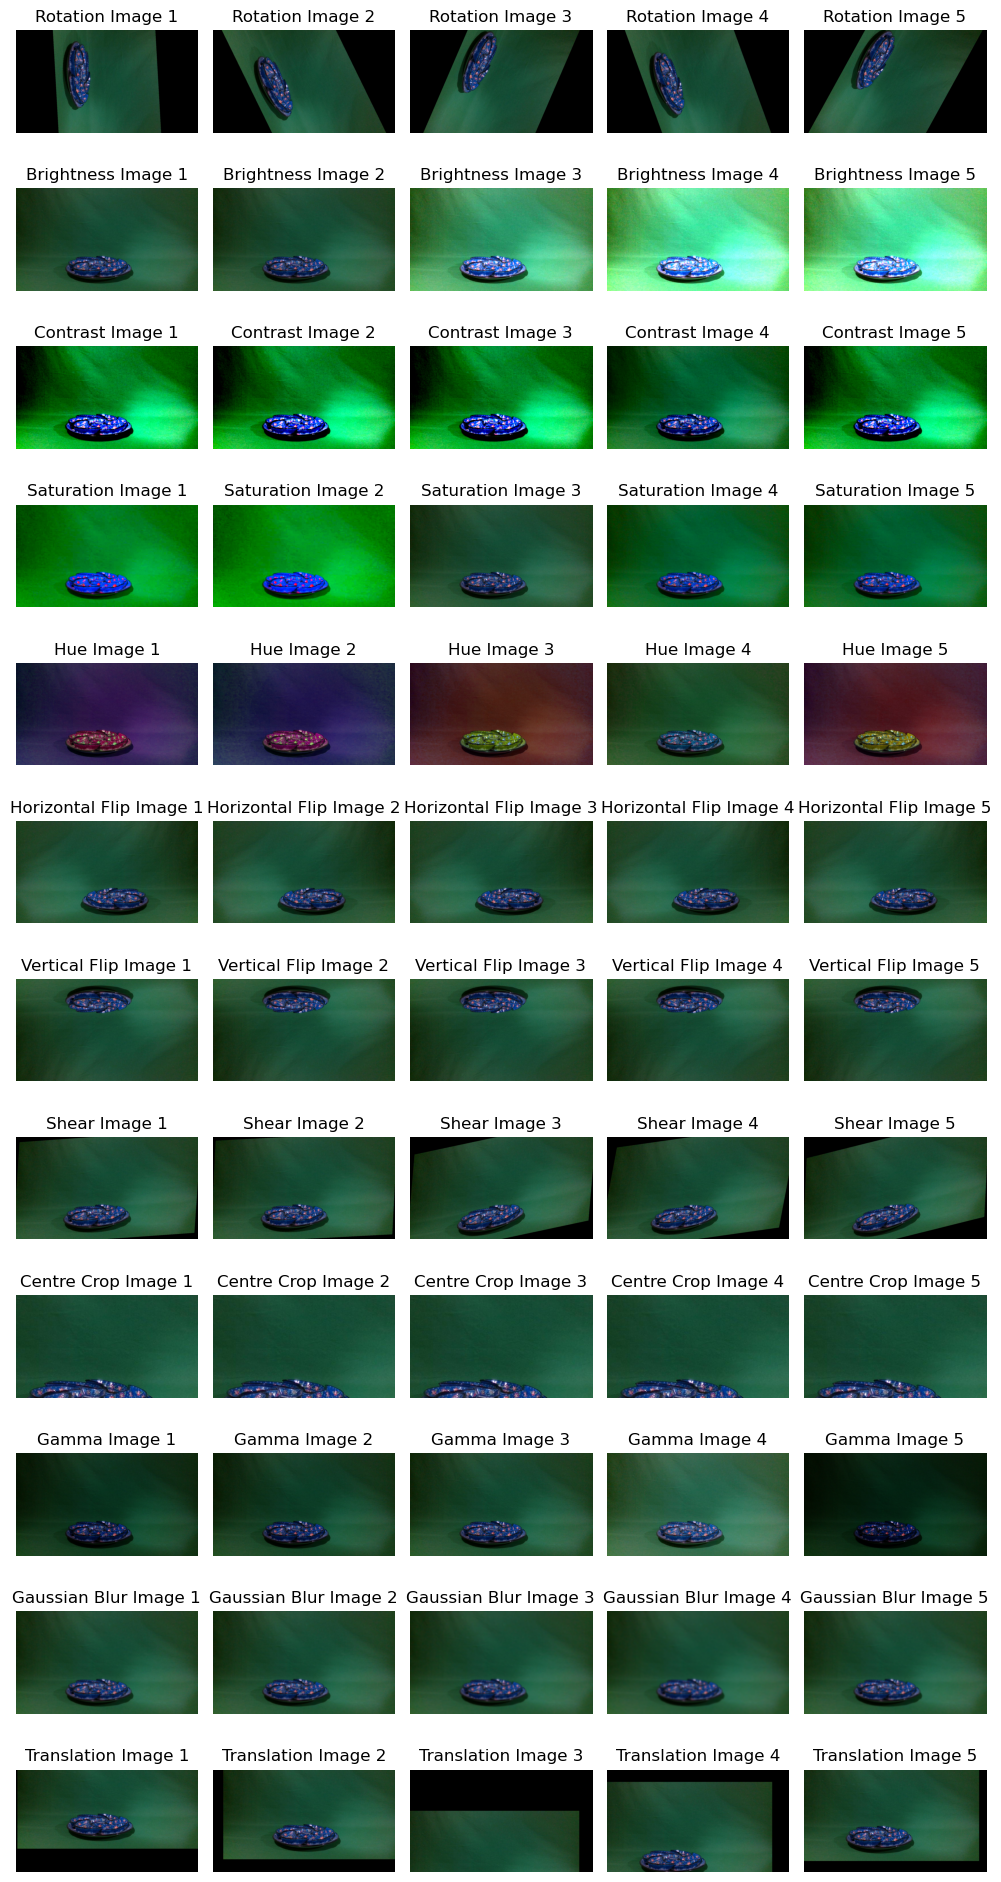

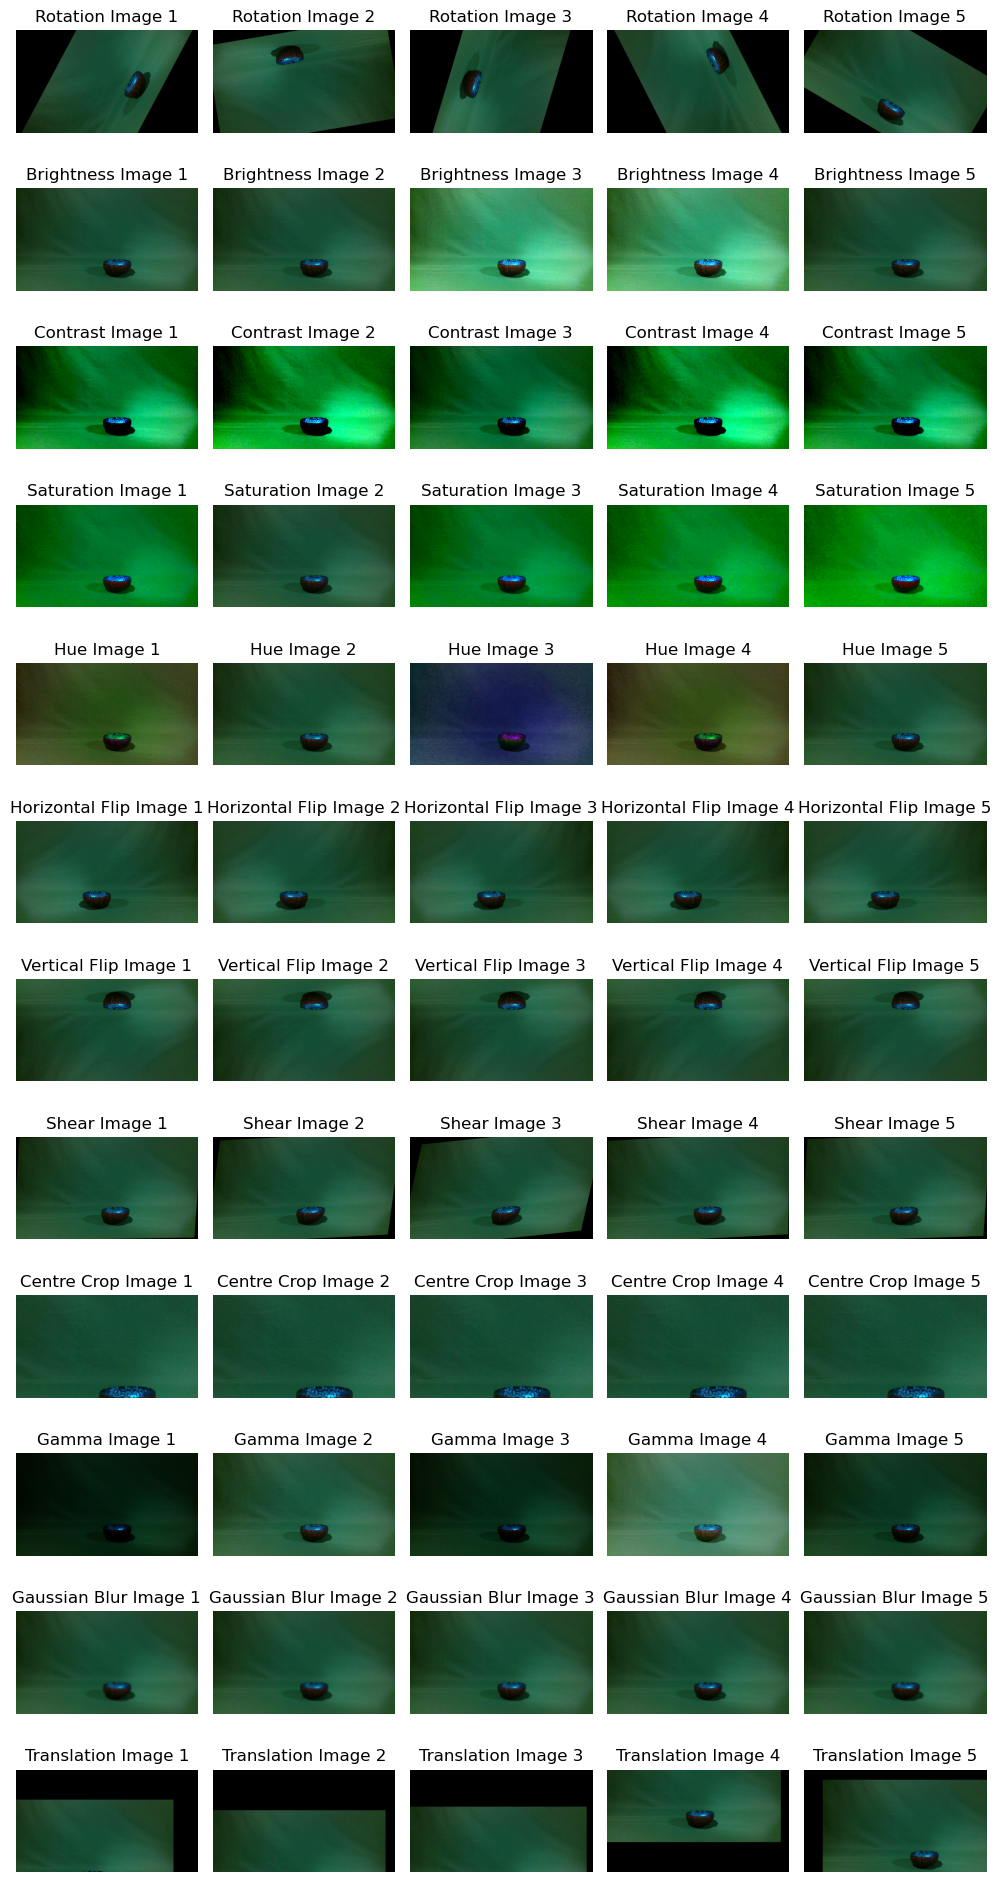

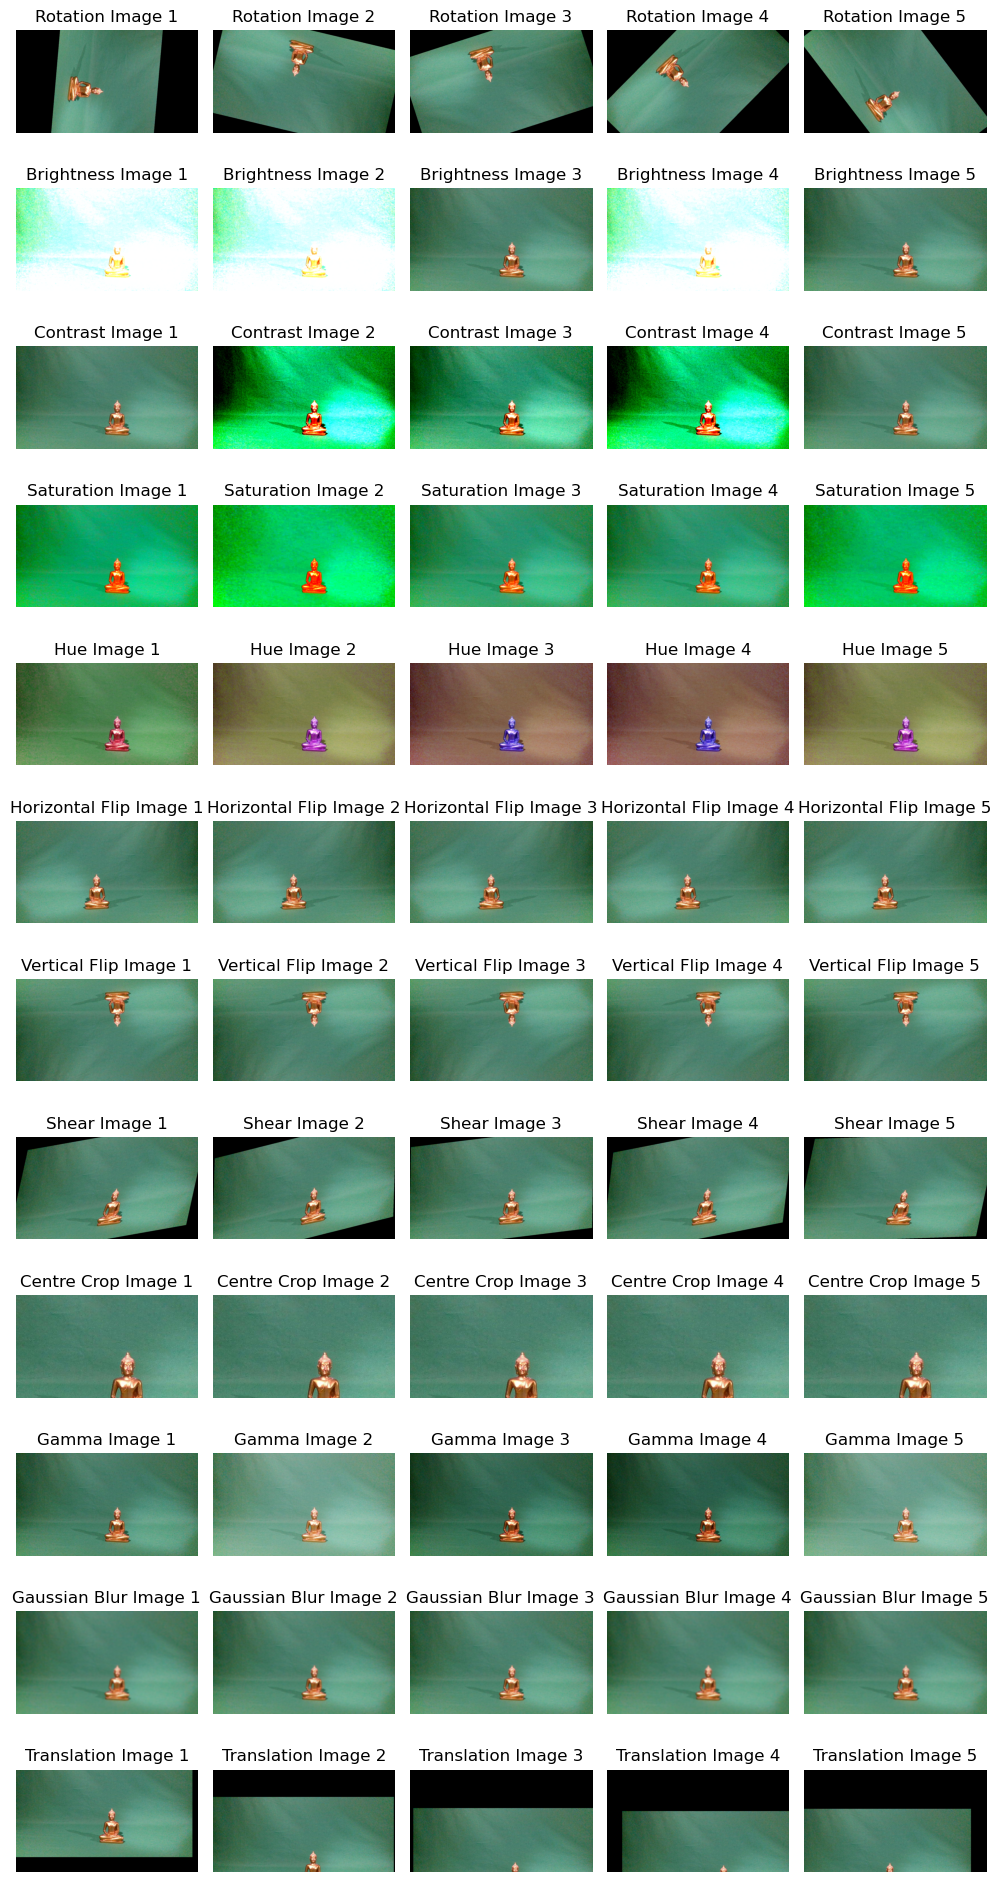

In [19]:
rows, cols = 12,5

#Looping through all the augmented images
for imgSet in AugmentedImgs:
    fig, ax = plt.subplots(12, 5, figsize=(10,20))
    row = 0
    for key in imgSet:
        for cnt in range(5):
            col = cnt % 5
            
            #Setting the image
            ax[row][col].imshow(imgSet[key][cnt][0])
            
            #Setting the title
            ax[row][col].set_title(imgSet[key][cnt][1]+" "+str(cnt+1)) 
            
            #Removing the axes
            ax[row][col].axis('off') 
            fig.tight_layout()
        row += 1 

**SaveImages** - This function saves the passed list of images to the specified directory

In [20]:
def SaveImages(listOfImages, directory):
    if not os.path.exists(directory):
       # Create a new directory if it does not exist
       os.makedirs(directory)
    
    count = 1
    for imgSet in listOfImages:
        
        for key in imgSet:
            if not os.path.exists(directory+key+"/"):
               # Create a new directory if it does not exist
               os.makedirs(directory+key+"/")
            
            for x in range(5):
                #Saving the images
                imgSet[key][x][0].save(directory+key+"/Item_"+str(count)+"_"+imgSet[key][x][1]+"_"+str(x+1)+".jpeg", 'JPEG')
        count += 1

In [21]:
SaveImages(AugmentedImgs, "./images/AugmentedImagesPyTorch/")